<a href="https://www.kaggle.com/code/idiotprofessor/average-word2vec-and-lstm?scriptVersionId=209678284" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sms-spam-collection-dataset/spam.csv


# Importing Library

In [2]:
#Importing all the libraries to be used
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split   
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, classification_report, accuracy_score, f1_score
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB

# Reading Data

In [3]:
data = pd.read_csv('/kaggle/input/sms-spam-collection-dataset/spam.csv', encoding='ISO-8859-1')

In [4]:
df = data.copy()

In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace = True)

In [7]:
df.rename(columns = {'v1': 'output', 'v2':'Message'}, inplace = True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   output   5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df['output'].value_counts()

output
ham     4825
spam     747
Name: count, dtype: int64

# Visualizing data distribution

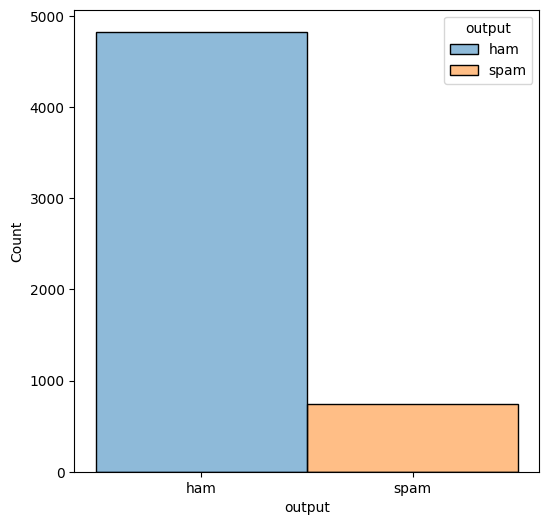

In [10]:
plt.figure(figsize=(6,6))
sns.histplot(data = df, x= 'output', hue = 'output');

In [11]:
df['output'].replace({'ham':0, 'spam':1})

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: output, Length: 5572, dtype: int64

In [12]:
output_dummies = pd.get_dummies(df['output'], prefix='output')
df = pd.concat([df.drop(columns = ['output']), output_dummies], axis = 1)
df.head()

,Message,output_ham,output_spam
0,"Go until jurong point, crazy.. Available only ...",True,False
1,Ok lar... Joking wif u oni...,True,False
2,Free entry in 2 a wkly comp to win FA Cup fina...,False,True
3,U dun say so early hor... U c already then say...,True,False
4,"Nah I don't think he goes to usf, he lives aro...",True,False


In [13]:
df.replace({True : 1, False : 0}, inplace = True)

In [14]:
df.drop(columns = ['output_ham'], inplace = True)

In [15]:
#Data cleaning and preprocessing
import re
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

# Corpus after removing all the stop word and special char

In [17]:
corpus = []
for i in range(0, len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [18]:
len(corpus)

5572

# Converting each words into vector, choosing most important 2500

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [20]:
y=df.drop('Message', axis=1)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Creating models

**1 Multinomial NB**

In [22]:
spam_detect_model = MultinomialNB().fit(X_train, y_train)
y_pred = spam_detect_model.predict(X_test)

In [23]:
accuracy_score(y_test,y_pred)

0.9865470852017937

In [24]:
# Generating the classification report
report = classification_report(y_test, y_pred) 
print(report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



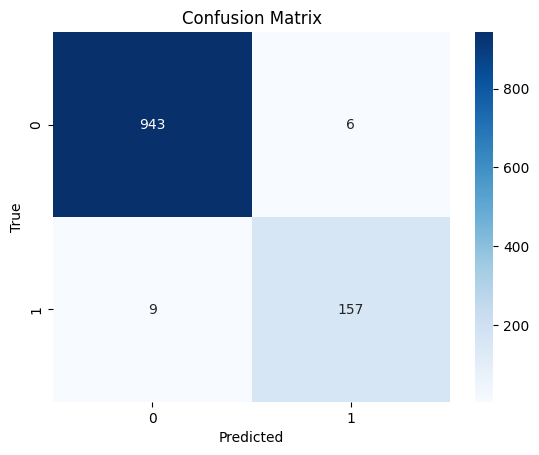

In [25]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix');

**2. Random Forest**

In [26]:
spam_detect_model1 = RandomForestClassifier().fit(X_train, y_train)
y_pred1 = spam_detect_model1.predict(X_test)

In [27]:
accuracy_score(y_test,y_pred1)

0.97847533632287

In [28]:
report = classification_report(y_test, y_pred1) 
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.86      0.92       166

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115



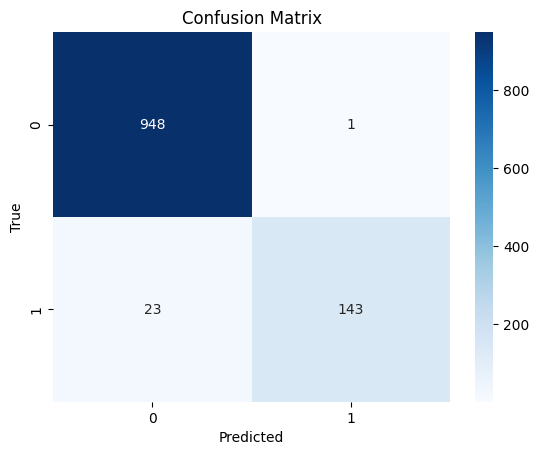

In [29]:
cm = confusion_matrix(y_test, y_pred1)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix');

# TF IDF

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
tv = TfidfVectorizer(max_features=2500)
X = tv.fit_transform(corpus).toarray()

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [32]:
spam_detect_model2 = RandomForestClassifier().fit(X_train, y_train)
y_pred2 = spam_detect_model2.predict(X_test)

In [33]:
accuracy_score(y_test,y_pred2)

0.9802690582959641

In [34]:
report = classification_report(y_test, y_pred2) 
print(report)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       949
           1       0.99      0.87      0.93       166

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



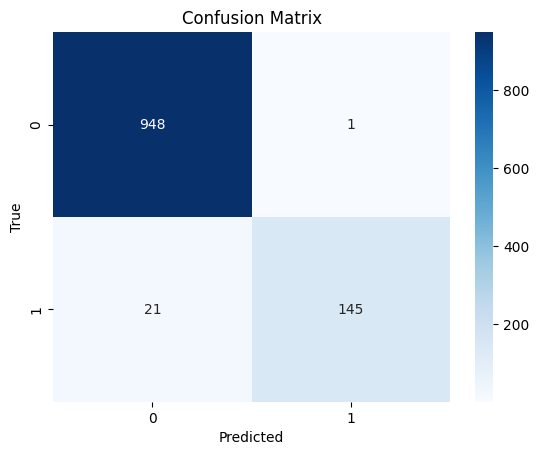

In [35]:
cm = confusion_matrix(y_test, y_pred2)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix');

In [36]:
from nltk import sent_tokenize
from gensim.utils import simple_preprocess

**Iterating through each word**

In [37]:
words=[]
for sent in corpus:
    sent_token=sent_tokenize(sent)
    for sent in sent_token:
        words.append(simple_preprocess(sent))

In [38]:
import gensim

# Gensim word2vec model

In [39]:
model=gensim.models.Word2Vec(words,window=5,min_count=2)

In [40]:
#all the words
#model.wv.index_to_key

In [41]:
#number of sentences in the corpus that was used to train the model.
model.corpus_count

5564

In [42]:
#one word is represented by 100 vectors
model.wv['work']

array([-0.23624726,  0.46586844,  0.14996842, -0.07071448,  0.02169085,
       -0.74482226,  0.28229606,  0.85773176, -0.26095256, -0.24952127,
       -0.21632211, -0.73844117, -0.20162122,  0.07881331,  0.1540571 ,
       -0.3479894 , -0.03580297, -0.5801521 , -0.16242297, -0.8776717 ,
        0.3041234 ,  0.22842877,  0.15208077, -0.2164625 , -0.19515972,
        0.09862665, -0.3143678 , -0.5020969 , -0.36459136,  0.06978429,
        0.41651306,  0.16296849,  0.10628217, -0.21536076, -0.20950407,
        0.42612317,  0.08585349, -0.3624245 , -0.23594557, -0.8424937 ,
        0.05615344, -0.20974469, -0.10260672, -0.07296528,  0.42897192,
       -0.23124833, -0.41308042, -0.1005796 ,  0.30527905,  0.46568352,
        0.14524679, -0.47708356, -0.16764325, -0.00844089, -0.28363   ,
        0.31729665,  0.21142279, -0.0557299 , -0.50851405,  0.02334713,
        0.08730172,  0.1271411 , -0.05589876, -0.23982297, -0.61652946,
        0.14782207,  0.09298634,  0.34031308, -0.49647608,  0.40

**Mean of vector elements in a sentence**

In [43]:
#creating avg word2vec model for each sentence, all 100 vectors will be averaged
def avg_word2vec(doc):
    return np.mean([model.wv[word] for word in doc if word in model.wv.index_to_key],axis=0)

**Creating a list of avg sum of vectors in a sentence**

In [44]:
X=[]
for i in range(len(words)):
    X.append(avg_word2vec(words[i]))

In [45]:
type(X)

list

In [46]:
X = np.array(X, dtype=object)

**# Actual length is 5572, but length of X is 5564, because stemming and stopwords removed some senttences, we will find them below.**

In [47]:
[[i,j,k] for i,j,k in zip(list(map(len,corpus)),corpus, df['Message']) if i<1]

[[0, '', 'What you doing?how are you?'],
 [0, '', 'Where @'],
 [0, '', '645'],
 [0, '', 'Can a not?'],
 [0, '', ':) '],
 [0, '', 'What you doing?how are you?'],
 [0, '', ':( but your not here....'],
 [0, '', ':-) :-)']]

**Removed y values where x is nan**

In [48]:
y = df[list(map(lambda x: len(x)>0 ,corpus))]
y=pd.get_dummies(y['output_spam'])
y=y.iloc[:,1].values

y.shape

(5564,)

# Creating a new Dataframe for word2vec

In [49]:
df1 = pd.DataFrame(X)

In [50]:
df1['output'] = y

In [51]:
df1.rename(columns = {0 : 'vector'}, inplace = True)

In [52]:
df1['output'].replace({True : 1, False : 0}, inplace = True)

In [53]:
df1.head()

,vector,output
0,"[-0.13760859, 0.27000022, 0.09125856, -0.04301...",0
1,"[-0.09996845, 0.20178434, 0.07442959, -0.03370...",0
2,"[-0.1332079, 0.2621704, 0.086701296, -0.035713...",1
3,"[-0.16949938, 0.3244005, 0.10982262, -0.063218...",0
4,"[-0.12223878, 0.23969997, 0.08243082, -0.03761...",0


**Removing Nan rows**

In [54]:
df_nan_rows = df1[df1.isna().any(axis=1)]
print(df_nan_rows)

     vector  output
449     NaN       0
781     NaN       0
803     NaN       0
891     NaN       0
1442    NaN       0
1550    NaN       0
1589    NaN       0
1832    NaN       0
1991    NaN       0
2411    NaN       0
3733    NaN       0
3989    NaN       0
4278    NaN       0
4285    NaN       0
4472    NaN       0
4846    NaN       0
5165    NaN       0


In [55]:
df1.dropna(inplace = True)

In [56]:
df1.shape

(5547, 2)

**Converting array sequence to list to fit in model**

In [57]:
df1['vector'] = df1['vector'].apply(lambda x: list(x))

In [58]:
X = df1['vector'].tolist()

In [59]:
y= df1['output']

In [60]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [61]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [62]:
y_pred3 = model.predict(x_test)

In [63]:
accuracy_score(y_test,y_pred3)

0.9621621621621622

In [64]:
report = classification_report(y_test, y_pred3) 
print(report)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       960
           1       0.91      0.80      0.85       150

    accuracy                           0.96      1110
   macro avg       0.94      0.89      0.91      1110
weighted avg       0.96      0.96      0.96      1110



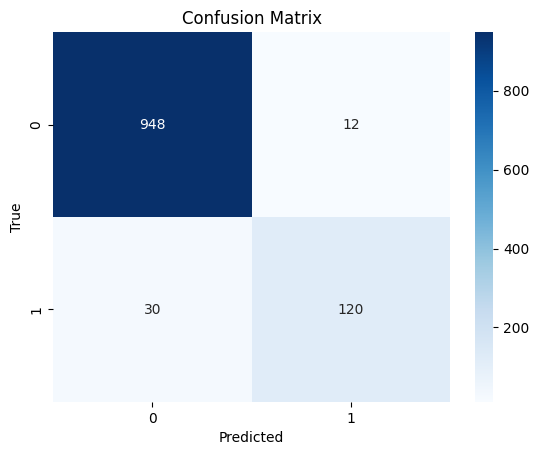

In [65]:
cm = confusion_matrix(y_test, y_pred3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix');

# Word Embedding Techniques using Embedding Layer in Keras

In [66]:
import tensorflow as tf
print(tf.__version__)

2.16.1


In [67]:
from tensorflow.keras.preprocessing.text import one_hot

In [68]:
len(corpus)

5572

In [69]:
### Vocabulary size
voc_size=10000

In [70]:
#this will give list with index of words from voc_size, i.e if a sentence has 3 words, it will give list of those 3 word's indexes
AttributeError=[one_hot(words,voc_size)for words in corpus] 

**Model building**

In [71]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [72]:
len(max(corpus))

73

In [87]:
## pre padding
## Pre-padding
sent_length = 75
onehot_repr = [one_hot(sent, voc_size) for sent in corpus]
embedded_docs = pad_sequences(onehot_repr, padding='pre', maxlen=sent_length)

In [88]:
## 100 feature dimesnions
dim=100

In [89]:
from keras.layers import Embedding, Flatten

In [90]:
model=Sequential()
model.add(Embedding(voc_size,1,input_length=sent_length))
model.add(Flatten())
model.compile('adam','mse')

In [91]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [92]:
x = model.predict(embedded_docs)

175/175 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [93]:
y= df['output_spam']

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

In [95]:
spam_detect_model5 = RandomForestClassifier().fit(x_train, y_train)
y_pred5 = spam_detect_model5.predict(x_test)

In [96]:
accuracy_score(y_test, y_pred5)

0.9121076233183857

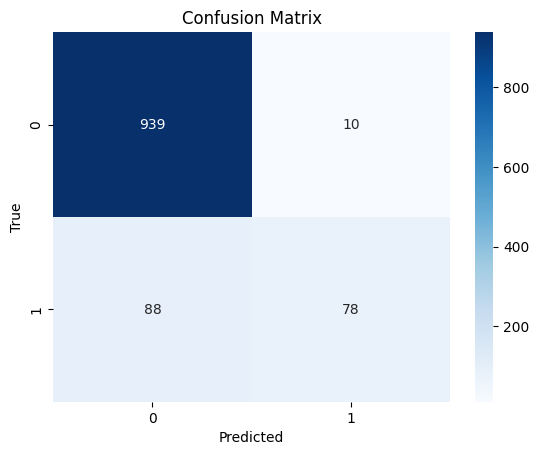

In [97]:
cm = confusion_matrix(y_test, y_pred5)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix');

In [98]:
report = classification_report(y_test, y_pred5)
print(report)

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       949
           1       0.89      0.47      0.61       166

    accuracy                           0.91      1115
   macro avg       0.90      0.73      0.78      1115
weighted avg       0.91      0.91      0.90      1115

